<a href="https://colab.research.google.com/github/medha-05/DWP-and-Tech-lab-Practicals/blob/main/Techlab_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/lucko515/regression-python/refs/heads/master/Salaries%20based%20on%20Positions%20-%20dataset/Position_Salaries.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 372.0+ bytes


In [ ]:
df.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [ ]:
features = df.iloc[:,1:-1].values
labels = df.iloc[:,2].values
print(features)
print(labels)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [ ]:
# Drop level column
df.drop(['Level'], axis=1, inplace=True)

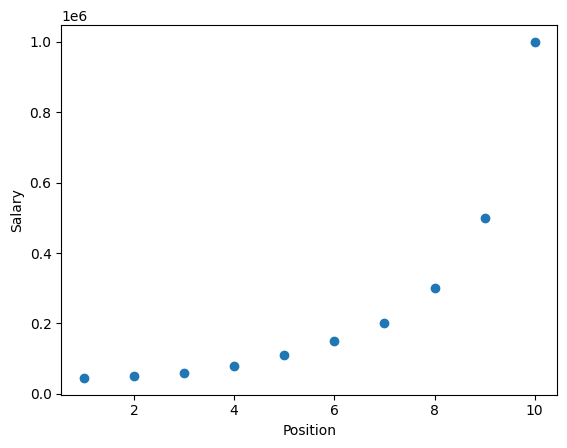

In [ ]:
plt.scatter(features, labels)
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()

## **Simple linear regression**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()
lr.fit(features, labels)

LinearRegression()

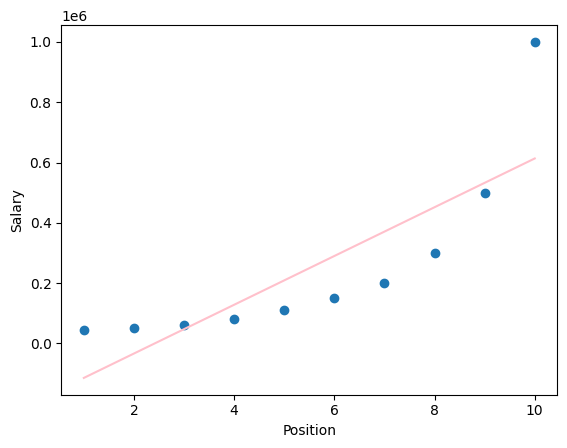

In [ ]:
plt.scatter(features, labels)
plt.plot(features, lr.predict(features), color='pink')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()

# **The distance from the pink line of blue dots is known as residuals**

# **As we already assumed this model is not going to work well**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly_reg = PolynomialFeatures(degree=3)
features_poly = poly_reg.fit_transform(features)

In [ ]:
features_poly

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

In [ ]:
poly_reg.fit(features_poly, labels)

PolynomialFeatures(degree=3)

In [ ]:
poly_reg_new = LinearRegression()
poly_reg_new.fit(features_poly, labels)

LinearRegression()

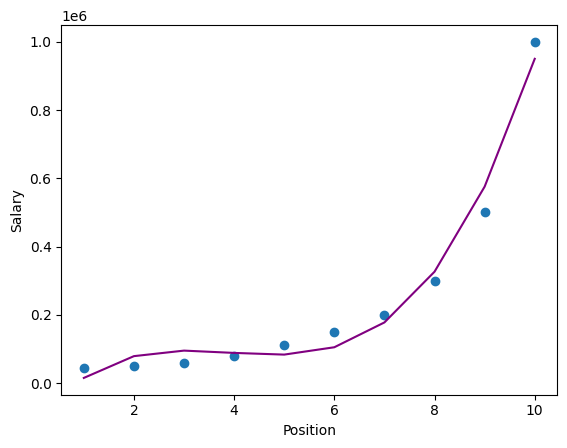

In [ ]:
plt.scatter(features, labels)
plt.plot(features, poly_reg_new.predict(poly_reg.fit_transform(features)), color='purple')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()

In [ ]:
# Accuracy Calculation
from sklearn.metrics import r2_score

#Accuracy
print(r2_score(labels, poly_reg_new.predict(poly_reg.fit_transform(features))))



0.9812097727913366
